In [1]:
import numpy as np

# Initial attempt to create initial value problem for breast cancer

In [ ]:
def calculate_drug_concentration():
    pass

def cancer_ode(t, y):
    # separate y
    T, N, CD, NK = y

    # import constants
    g_T, g_N = 1, 1
    T_max, N_max = 1, 1
    a_0, a_1, a_2, a_3, a_4, a_5 = 1, 1, 1, 1, 1
    E_c, E_d = 1, 1
    k_N = 1
    r_CD, k_CD = 1, 1
    r_NK, k_NK = 1, 1
    rho_0, alpha_0 = 1,1
    rho_1, alpha_1 = 1,1
    b_CD = 1
    i = 2

    # Need....
    a_0, a_1, r_CD, r_NK, b_CD

    D_c, D_d = calculate_drug_concentration()
    
    dT = (g_T * T * np.log(T_max / T) - a_1*N*T - a_2*NK*T - a_3*CD*T -
        (E_c*D_c+(4/5)*E_d*D_d)*T)
    dN = g_N*N*np.log(N_max / N) - k_N - a_0*N*T
    dCD = r_CD - k_CD - (rho_0*CD*T**i)/(alpha_0 + T**i) - a_4*CD*T - b_CD*D_c*CD
    dNK = r_NK - k_NK - (rho_1*NK*T**i)/(alpha_1 + T**i) - a_5*NK*T

    return np.array([dT, dN, dCD, dNK])


## Constants?

In [ ]:
# import constants
g_T, g_N = 1, 1
T_max, N_max = 1, 1
a_0, a_1, a_2, a_3, a_4 = 1, 1, 1, 1, 1
E_c, E_d = 1, 1
k_N = 1
r_CD, k_CD = 1, 1
r_NK, k_NK = 1, 1
rho_0, alpha_0 = 1,1
# From 
rho_1, alpha_1 = 1,1
b_CD = 1
i = 2
# Rate of CD8+T-lysed tumor cell debris activation of CD8+ T-cells
rho_0 = 1.245e-2

# Tumor size for half-maximal CD8+T-lysed debris CD8+ T activation
alpha_0 = 2.5036e-3

# Tumor size for half-maximal NK-lysed debirs NK activation
alpha_1 =  2.02e7 # 2.5036*10 previous value

# Rate of NK-lysed tumor cell debris activation of NK Cells
rho_1 = 1.25e-2 # 6.68 * 10**(-2) previous value

# Rate of CD8+ T-cell death due to tumor interaction
a_4 = 3.422e-10 

# Rate of activated CD8+ T-cell turnover
k_cd = 9e-3

# Rate of chemotherapy-induced tumor death
a_2 = 0.9

# Michaelis Menten Kinetics
i = 1

# Max tumor population
T_max = 2

# Natural turnover rate of natural killer cells (2 weeks)
k_NK = 1/14

# Natural turnover rate for epithelial cells lining ducts (40yr women)
k_N = 1/147

# Rate of NK cell death due to tumor interaction 𝑐𝑒𝑙𝑙𝑠−1/𝐷𝑎𝑦−1
a_5 = 2.794*(10**(-13))

# Max epithelial cell count
N_max = T_max / (1/100)

18095737137265.734


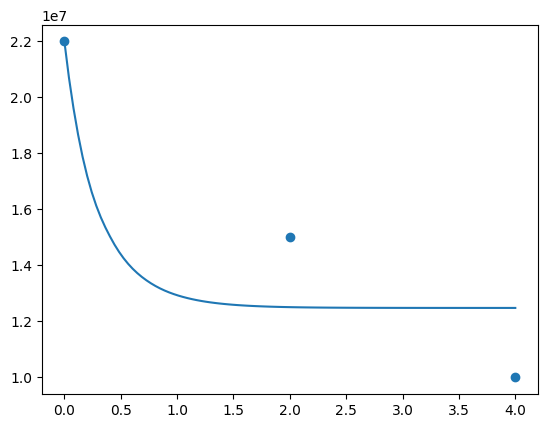

0.007921653181802194


In [25]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Sample data (time in days, CD8+ % remaining)
time_data = np.array([0, 2, 4])
CD_data = np.array([2.2e7, 1.5e7, 1e7])  # Hypothetical recovery phase

def ode(t, y, const):
    drug, CD8 = y

    drug_prime = - np.log(2)*drug / (1/4)
    CD8_prime = - const*drug*CD8
    return np.array([drug_prime, CD8_prime])
init_dose = 20*10 # Really difficult to guess, but is 20g/kg of body weight for a tiny mouse so...

def func(const):
    sol = solve_ivp(ode, t_span=(0, 4), y0=np.array([init_dose, 2.2e7]), t_eval=np.array([0,2,4]), args=(const[0],))
    return np.sum((CD_data - sol.y[1])**2)

print(func(np.array([.01])))

res = minimize(func, np.array([.1]) )
best_const = res.x

sol = solve_ivp(ode, (0, 4), np.array([init_dose, 2.2e7]), t_eval=np.linspace(0,4,100), args=(best_const[0],))

plt.plot(sol.t, sol.y[1])
plt.scatter(time_data, CD_data)
plt.show()

print(best_const[0])


![alt text](image.png)